In [575]:
#Dependcies 

from sklearn import *
from sklearn.model_selection import GroupKFold
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [576]:
# Read The Datasets 

df1=pd.read_csv("TeamBatMLB2006-2022.csv")
df1

,Tm,#Bat,BatAge,R/G,G,PA,AB,Runs Scored,H,2B,...,LOB,PLAYOFFS,UBB,wOBA,Runs Allowed,Py_Win%,W,L,W-L%,YEAR
0,Arizona Diamondbacks,45,29.6,4.77,162,6330,5645,773,1506,331,...,1166,0,457,0.329642,788,0.490392,76,86,0.469000,2006
1,Atlanta Braves,45,27.4,5.24,162,6284,5583,849,1510,312,...,1105,0,478,0.343888,805,0.526583,79,83,0.488000,2006
2,Baltimore Orioles,46,30.4,4.74,162,6240,5610,768,1556,288,...,1177,0,439,0.334706,899,0.421898,70,92,0.432000,2006
3,Boston Red Sox,53,30.4,5.06,162,6435,5619,820,1510,327,...,1301,0,616,0.343672,825,0.496961,86,76,0.531000,2006
4,Chicago Cubs,46,28.6,4.42,162,6147,5587,716,1496,271,...,1082,0,371,0.323917,834,0.424310,66,96,0.407000,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,St. Louis Cardinals,51,28.5,4.36,162,6001,5351,706,1303,261,...,1081,1,446,0.317893,672,0.524658,90,72,0.555556,2021
506,Tampa Bay Rays,61,27.7,5.29,162,6213,5507,857,1336,288,...,1085,1,558,0.328624,651,0.634102,100,62,0.617284,2021
507,Texas Rangers,54,26.8,3.86,162,5943,5405,625,1254,225,...,1007,0,423,0.296566,815,0.370313,60,102,0.370370,2021
508,Toronto Blue Jays,62,26.8,5.22,162,6070,5476,846,1455,285,...,1056,0,482,0.347296,663,0.619515,91,71,0.561728,2021


In [577]:
df1["Run_Diff"]=df1["Runs Scored"]-df1["Runs Allowed"]
df1["WAR"]=df1["W"]-0.294*df1["G"]
df1

,Tm,#Bat,BatAge,R/G,G,PA,AB,Runs Scored,H,2B,...,UBB,wOBA,Runs Allowed,Py_Win%,W,L,W-L%,YEAR,Run_Diff,WAR
0,Arizona Diamondbacks,45,29.6,4.77,162,6330,5645,773,1506,331,...,457,0.329642,788,0.490392,76,86,0.469000,2006,-15,28.372
1,Atlanta Braves,45,27.4,5.24,162,6284,5583,849,1510,312,...,478,0.343888,805,0.526583,79,83,0.488000,2006,44,31.372
2,Baltimore Orioles,46,30.4,4.74,162,6240,5610,768,1556,288,...,439,0.334706,899,0.421898,70,92,0.432000,2006,-131,22.372
3,Boston Red Sox,53,30.4,5.06,162,6435,5619,820,1510,327,...,616,0.343672,825,0.496961,86,76,0.531000,2006,-5,38.372
4,Chicago Cubs,46,28.6,4.42,162,6147,5587,716,1496,271,...,371,0.323917,834,0.424310,66,96,0.407000,2006,-118,18.372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,St. Louis Cardinals,51,28.5,4.36,162,6001,5351,706,1303,261,...,446,0.317893,672,0.524658,90,72,0.555556,2021,34,42.372
506,Tampa Bay Rays,61,27.7,5.29,162,6213,5507,857,1336,288,...,558,0.328624,651,0.634102,100,62,0.617284,2021,206,52.372
507,Texas Rangers,54,26.8,3.86,162,5943,5405,625,1254,225,...,423,0.296566,815,0.370313,60,102,0.370370,2021,-190,12.372
508,Toronto Blue Jays,62,26.8,5.22,162,6070,5476,846,1455,285,...,482,0.347296,663,0.619515,91,71,0.561728,2021,183,43.372


In [578]:
df1.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'Runs Scored', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'PLAYOFFS',
       'UBB', 'wOBA', 'Runs Allowed', 'Py_Win%', 'W', 'L', 'W-L%', 'YEAR',
       'Run_Diff', 'WAR'],
      dtype='object')

In [579]:
#Sort the Dataframe by these columns ["SLG","OBP","wOBA","Py_Win%","Run_Diff", "R/G"]

BA=df1[["BA",]].groupby(df1["Tm"]).mean()
SLG=df1[["SLG"]].groupby(df1["Tm"]).mean()
OBP=df1[["OBP"]].groupby(df1["Tm"]).mean()
wOBA=df1[["wOBA"]].groupby(df1["Tm"]).mean()
Py_Win=df1[["Py_Win%"]].groupby(df1["Tm"]).mean()
Run_Diff=df1[["Run_Diff"]].groupby(df1["Tm"]).mean()
Runs_Per_Game=df1[["R/G"]].groupby(df1["Tm"]).mean()
WAR=df1[["WAR"]].groupby(df1["Tm"]).mean()

BA=BA.sort_values(by="BA",ascending=False)
SLG=SLG.sort_values(by="SLG",ascending=False)
OBP=OBP.sort_values(by="OBP",ascending=False)
wOBA=wOBA.sort_values(by="wOBA",ascending=False)
Py_Win=Py_Win.sort_values(by="Py_Win%",ascending=False)
Run_Diff=Run_Diff.sort_values(by="Run_Diff",ascending=False)
Runs_Per_Game=Runs_Per_Game.sort_values(by="R/G",ascending=False)
WAR=WAR.sort_values(by="WAR",ascending=False)

WAR

,WAR
Tm,
Cleveland Guardians,44.372000
New York Yankees,44.018353
Los Angeles Dodgers,44.018353
Los Angeles Angels of Anaheim,41.972000
St. Louis Cardinals,39.482000
Tampa Bay Rays,38.818267
Boston Red Sox,38.724235
Atlanta Braves,35.817647
Cleveland Indians,34.908000


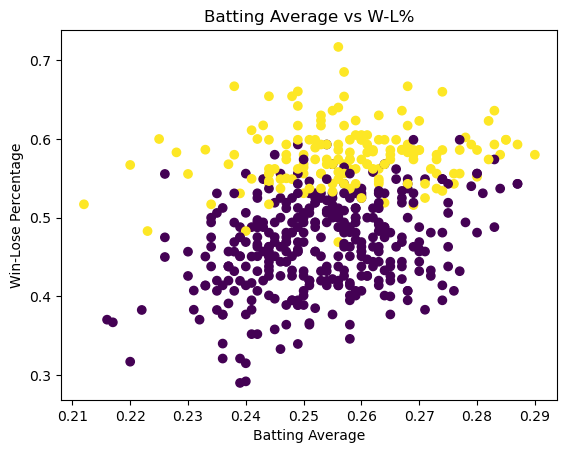

In [580]:
#Different Scatter Plots

plt.scatter(df1["BA"], df1["W-L%"], c=df1["PLAYOFFS"])
plt.xlabel("Batting Average")
plt.ylabel("Win-Lose Percentage")
plt.title("Batting Average vs W-L%")
plt.show()

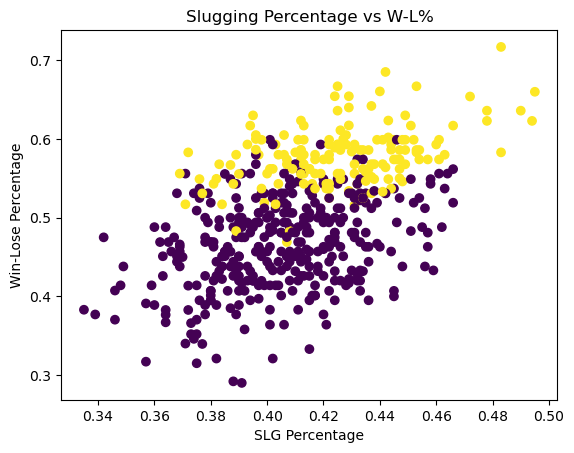

In [581]:
plt.scatter(df1["SLG"], df1["W-L%"], c=df1["PLAYOFFS"])
plt.xlabel("SLG Percentage")
plt.ylabel("Win-Lose Percentage")
plt.title("Slugging Percentage vs W-L%")
plt.show()

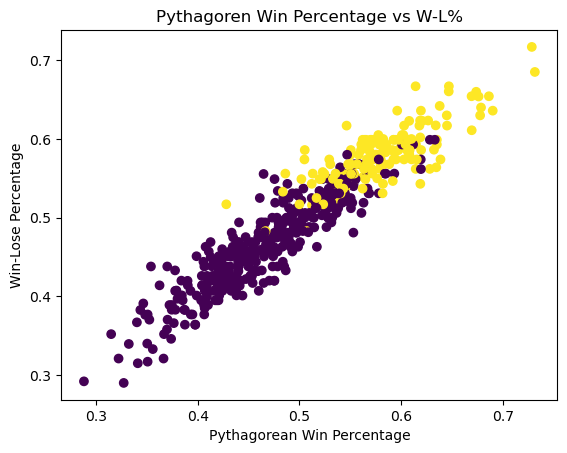

In [582]:
plt.scatter(df1["Py_Win%"], df1["W-L%"], c=df1["PLAYOFFS"])
plt.xlabel("Pythagorean Win Percentage")
plt.ylabel("Win-Lose Percentage")
plt.title("Pythagoren Win Percentage vs W-L%")
plt.show()

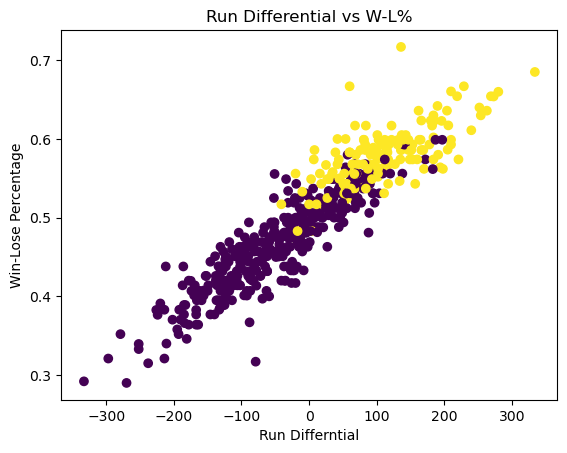

In [583]:
plt.scatter(df1["Run_Diff"], df1["W-L%"], c=df1["PLAYOFFS"])
plt.xlabel("Run Differntial")
plt.ylabel("Win-Lose Percentage")
plt.title("Run Differential vs W-L%")
plt.show()

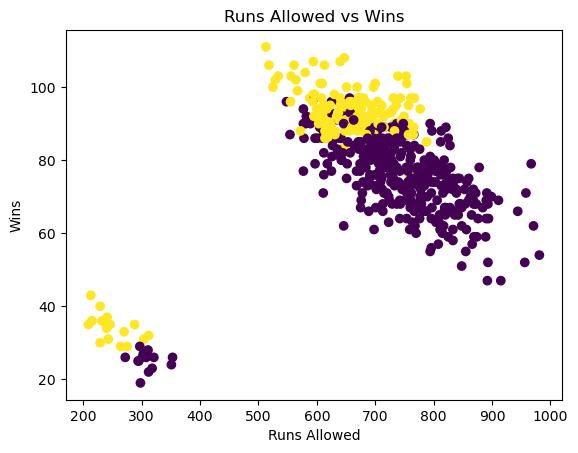

In [584]:
plt.scatter(df1["Runs Allowed"], df1["W"], c=df1["PLAYOFFS"])
plt.xlabel("Runs Allowed")
plt.ylabel("Wins")
plt.title("Runs Allowed vs Wins")
plt.show()

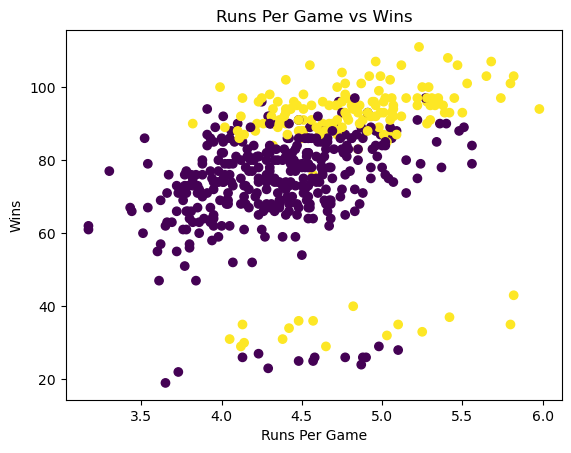

In [585]:
plt.scatter(df1["R/G"], df1["W"], c=df1["PLAYOFFS"])
plt.xlabel("Runs Per Game")
plt.ylabel("Wins")
plt.title("Runs Per Game vs Wins")
plt.show()

In [586]:
lg_avg=df1[["Tm","BA","SLG","OBP","wOBA","Py_Win%"]].groupby(df1["YEAR"]).mean()
lg_avg

,BA,SLG,OBP,wOBA,Py_Win%
YEAR,,,,,
2006,0.269267,0.431800,0.336400,0.335405,0.500409
2007,0.267933,0.422467,0.335700,0.331757,0.499966
2008,0.263667,0.416133,0.332933,0.328253,0.500519
2009,0.262483,0.417966,0.332655,0.329037,0.503250
2010,0.257290,0.402677,0.325677,0.319968,0.496648
2011,0.254933,0.398833,0.320467,0.315742,0.499419
2012,0.254400,0.405200,0.319000,0.317692,0.501588
2013,0.253367,0.396333,0.317467,0.313876,0.499846
2014,0.251100,0.386200,0.313667,0.308183,0.500801


In [587]:
#Split The Dataset into Training and Testing Sets
inputs=df1[["BA","SLG","OBP","wOBA","Py_Win%","Run_Diff"]]
target=df1["PLAYOFFS"]

In [588]:
#Remove Outliers 

# plt.boxplot(df1["SLG"])
#plt.boxplot(df1["wOBA"])
#plt.boxplot(df1["Py_Win%"])
#plt.boxplot(df1["Run_Diff"])

columns =["BA","SLG","OBP","wOBA","Py_Win%","Run_Diff"]

for column in columns: 
    Q1=df1[column].quantile(0.25)
    Q3=df1[column].quantile(0.75)
    IQR=Q3-Q1

    upper=Q3+1.75*IQR
    lower=Q1-1.75*IQR

    df1=df1[(df1[column] >=lower) | (df1[column]<= upper)]



In [589]:
#Get The Logistic Model and GaussianNB Model and Plot the Points. 

LogReg=LogisticRegression(penalty='l2', solver='liblinear',fit_intercept=False)
GNB=GaussianNB()
DT=DecisionTreeClassifier(criterion='entropy',random_state=33, max_depth=7,
                          min_samples_leaf=1)
SVM=SVC()
KNN=KNeighborsClassifier(n_neighbors=8,algorithm='auto')
RF=RandomForestClassifier(n_estimators=10, random_state=30,ccp_alpha=0.003726)

In [590]:
X_train, X_test,y_train,y_test=train_test_split(inputs,target,train_size=0.8,random_state=100)
model=LogReg.fit(X_train,y_train)
# model=LogReg.fit(inputs,target)
y_pred=model.predict(X_test)

print("LogReg Score: ", accuracy_score(y_pred,y_test))

LogReg Score:  0.8529411764705882


In [591]:
X_train, X_test,y_train,y_test=train_test_split(inputs,target,train_size=0.8,random_state=100)
model2=GNB.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

print("GNB Score: ", accuracy_score(y_pred2,y_test))

GNB Score:  0.7745098039215687


In [592]:
X_train, X_test,y_train,y_test=train_test_split(inputs,target,train_size=0.8, random_state=100)
model4=SVM.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
print("SVM Score: ", accuracy_score(y_pred4,y_test))

SVM Score:  0.8529411764705882


In [593]:
# Add A Couple More Columns To df3

df3=pd.read_csv("TeamBATMLB2023.csv")
df3["Run_Diff"]=df3["Runs Scored"]-df3["Runs Allowed"]
df3.head()



,Tm,#Bat,BatAge,R/G,G,PA,AB,Runs Scored,H,2B,...,PLAYOFFS,UBB,wOBA,Runs Allowed,Py_Win%,W,L,W-L%,YEAR,Run_Diff
0,Arizona Diamondbacks,54,27.4,4.60,162,6124,5436,746,1359,274,...,1,529,0.321650,761,0.490047,84,78,0.519,2023,-15
1,Atlanta Braves,53,27.9,5.85,162,6249,5597,947,1543,293,...,1,518,0.366029,716,0.636276,104,58,0.642,2023,231
2,Baltimore Orioles,50,27.3,4.98,162,6123,5495,807,1399,309,...,1,498,0.325459,678,0.586218,101,61,0.623,2023,129
3,Boston Red Sox,56,28.6,4.77,162,6174,5562,772,1437,339,...,0,471,0.328710,776,0.497416,78,84,0.481,2023,-4
4,Chicago Cubs,48,28.4,5.06,162,6220,5504,819,1399,269,...,0,559,0.330675,723,0.562016,83,79,0.512,2023,96


In [594]:
#Apply Logistic Regression to The Present Season Dataset

inputs2=df3[["BA","SLG","OBP", "wOBA","Py_Win%","Run_Diff"]]

target2=df3["PLAYOFFS"]



modelFinal=model.predict(inputs2)

In [595]:
#Accuracy Score
accuracy_score(modelFinal,target2)

0.8333333333333334

In [596]:
#Print out Classification Report 
import statsmodels.api as sm

In [597]:
# Fit the model into the training set
# Then predict the values using the testing set

model1=LogReg.fit(inputs,target)
model2=GNB.fit(inputs,target)
model3=SVM.fit(inputs,target)
model4=KNN.fit(inputs,target)
model5=DT.fit(inputs,target)
model6=RF.fit(inputs,target)
MRF=RF.fit(X_train,y_train)

#Predict the testing values 
results=model1.predict(inputs2)
results2=model2.predict(inputs2)
results3=model3.predict(inputs2)
results4=model4.predict(inputs2)
results5=model5.predict(inputs2)
result6=model6.predict(inputs2)
results6XtXT=MRF.predict(inputs2)

In [598]:
#Get the true accuracy scores 
print("LogReg Score: ",accuracy_score(results, target2))
print("GNB Score: ",accuracy_score(results2,target2))
print("SVM Score:  ",accuracy_score(results3,target2))
print("KNN Score: ",accuracy_score(results4,target2))
print("DT Score: ",accuracy_score(results5,target2))
print("RF Score: ", accuracy_score(result6, target2))


LogReg Score:  0.8333333333333334
GNB Score:  0.8
SVM Score:   0.8333333333333334
KNN Score:  0.8333333333333334
DT Score:  0.7666666666666667
RF Score:  0.8


[Text(0.3964285714285714, 0.9375, 'X[4] <= 0.538\nentropy = 0.888\nsamples = 510\nvalue = [354, 156]'),
 Text(0.14285714285714285, 0.8125, 'X[5] <= -20.5\nentropy = 0.382\nsamples = 336\nvalue = [311, 25]'),
 Text(0.05714285714285714, 0.6875, 'X[5] <= -41.5\nentropy = 0.042\nsamples = 219\nvalue = [218, 1]'),
 Text(0.02857142857142857, 0.5625, 'entropy = 0.0\nsamples = 180\nvalue = [180, 0]'),
 Text(0.08571428571428572, 0.5625, 'X[4] <= 0.441\nentropy = 0.172\nsamples = 39\nvalue = [38, 1]'),
 Text(0.05714285714285714, 0.4375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11428571428571428, 0.4375, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.22857142857142856, 0.6875, 'X[0] <= 0.229\nentropy = 0.732\nsamples = 117\nvalue = [93, 24]'),
 Text(0.2, 0.5625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2571428571428571, 0.5625, 'X[4] <= 0.502\nentropy = 0.704\nsamples = 115\nvalue = [93, 22]'),
 Text(0.17142857142857143, 0.4375, 'X[4] <= 0.489\nentropy = 0.37

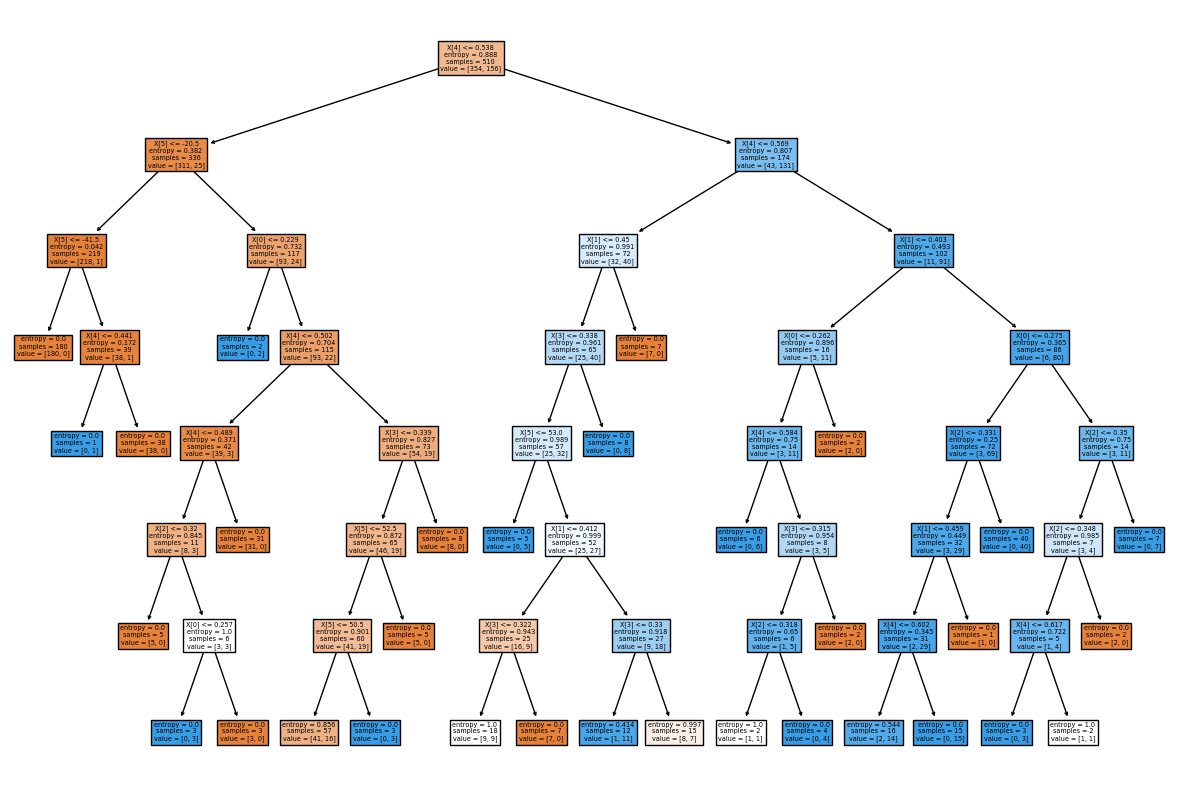

In [599]:
#Prune the decision tree model for a better accuracy 
#First, plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(model5,filled=True)

In [600]:
# Get the appropriate ccc_alpha value for pruning the decision tree
# Get cc_alpha score for the Decsion Tree model
path=model5.cost_complexity_pruning_path(inputs,target)
ccp_alphas,impurities=path.ccp_alphas,path.impurities 

results_DT=[]
for ccp_alpha in ccp_alphas: 
    result_DT=DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    result_DT.fit(inputs,target)
    results_DT.append(result_DT)

Text(0.5, 1.0, 'CCP Alphas vs Impuritites')

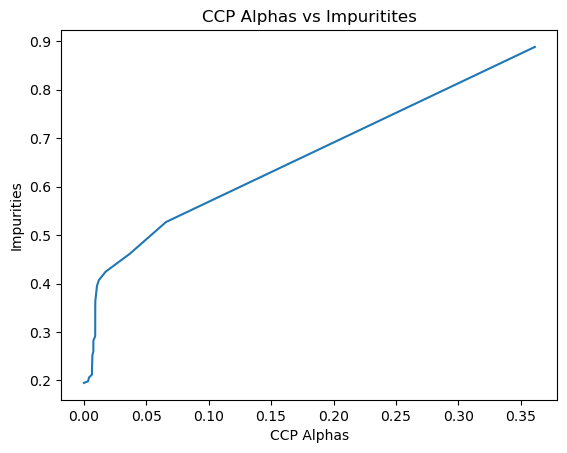

In [601]:
#Plot the alpha values along with the impunities 
plt.plot(ccp_alphas, impurities,)
plt.xlabel("CCP Alphas")
plt.ylabel("Impurities")
plt.title("CCP Alphas vs Impuritites")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.003156,0.003726,0.003925,0.006445,0.006465,0.006764,0.007534,0.007560,0.009006,0.009034,0.009049,0.009117,0.010438,0.011965,0.017406,0.036632,0.065758,0.361369
1,0.766667,0.800000,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.600000


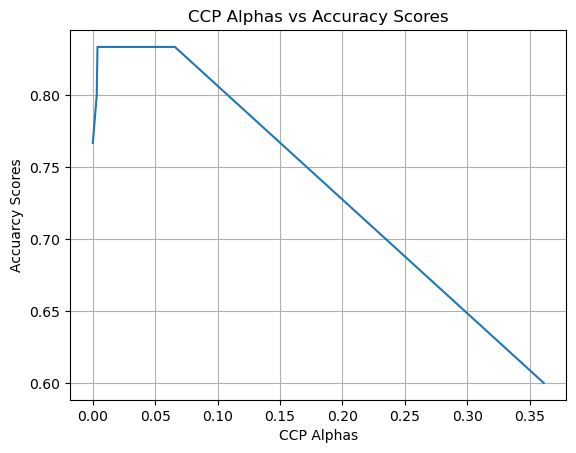

In [602]:

acc_scores=[accuracy_score(target2,result_DT.predict(inputs2)) for result_DT in results_DT]

#Plot the Scores 
plt.plot(ccp_alphas,acc_scores)
plt.grid()
plt.xlabel("CCP Alphas")
plt.ylabel("Accuarcy Scores")
plt.title("CCP Alphas vs Accuracy Scores")

alpha_accscore=pd.DataFrame([ccp_alphas,acc_scores]) 
alpha_accscore  

In [603]:
# Draw in the ROC Curve to figure our if we can improve the accuracy of the Logistic model. 

LogRegPredictProb=LogReg.predict_log_proba(inputs2)
# fpr, tpr=roc_curve(target2,LogRegPredictProb)
LogRegPredictProb

array([[-1.15598645e-01, -2.21487363e+00],
       [-4.23929151e+00, -1.45227496e-02],
       [-1.84840781e+00, -1.71367039e-01],
       [-1.47200753e-01, -1.98865566e+00],
       [-1.16947458e+00, -3.71832176e-01],
       [-1.01312344e-03, -6.89522372e+00],
       [-6.31567528e-02, -2.79354769e+00],
       [-7.34639133e-02, -2.64746806e+00],
       [-3.61348971e-04, -7.92584706e+00],
       [-2.41041084e-02, -3.73740083e+00],
       [-1.81724895e+00, -1.77300709e-01],
       [-1.51850508e-03, -6.49078808e+00],
       [-1.65461976e-02, -4.10986064e+00],
       [-3.69718527e+00, -2.51057428e-02],
       [-3.99634280e-02, -3.23970571e+00],
       [-9.56521023e-01, -4.84877347e-01],
       [-1.62394761e+00, -2.19548786e-01],
       [-1.26797299e-01, -2.12789438e+00],
       [-9.53079733e-02, -2.39791734e+00],
       [-2.62378745e-05, -1.05483197e+01],
       [-9.00898238e-01, -5.21220510e-01],
       [-1.42096318e-02, -4.26093165e+00],
       [-1.33023464e+00, -3.07089467e-01],
       [-1.